In [1]:
%%writefile brats_utils.py
import torch
import numpy as np
import nibabel as nib
from torch.utils.data import Dataset
import random
from pathlib import Path
from tqdm import tqdm

# --- Lazy Loading Dataset (Safe for Storage & RAM) ---
class BraTSDataset(Dataset):
    def __init__(self, data_dir, split_list, transform=None, cache=False):
        self.data_dir = Path(data_dir)
        self.case_ids = split_list
        self.transform = transform
        # cache=False forces disk reading to prevent RAM/Storage filling

    def load_case(self, case_id):
        case_dir = self.data_dir / case_id
        channels = []
        for modality in ['t1', 't1ce', 't2', 'flair']:
            path = case_dir / f"{case_id}_{modality}.nii.gz"
            if path.exists():
                img = nib.load(str(path)).get_fdata().astype(np.float32)
            else:
                img = np.zeros((128, 128, 128), dtype=np.float32)
            channels.append(img)
        image = np.stack(channels, axis=0)
        
        seg_path = case_dir / f"{case_id}_seg.nii.gz"
        if seg_path.exists():
            label = nib.load(str(seg_path)).get_fdata().astype(np.longlong)
        else:
            label = np.zeros((128, 128, 128), dtype=np.longlong)
        return image, label

    def __len__(self):
        return len(self.case_ids)
    
    def __getitem__(self, idx):
        case_id = self.case_ids[idx]
        np_image, np_label = self.load_case(case_id)
        image = torch.from_numpy(np_image)
        label = torch.from_numpy(np_label)
        
        if self.transform:
            image, label = self.transform(image, label)
        return image, label, case_id

class BraTSAugmentation:
    def __init__(self, **kwargs):
        self.config = kwargs
        self.spatial = self.config.get('spatial', {})
        if not self.spatial and 'random_flip_prob' in self.config:
            self.spatial = self.config

    def __call__(self, image, label):
        if random.random() < self.spatial.get('random_flip_prob', 0.5):
            dims = [1, 2, 3]
            for dim in dims:
                if random.random() < 0.5:
                    image = torch.flip(image, [dim])
                    label = torch.flip(label, [dim - 1])
        if random.random() < self.spatial.get('random_rotate_prob', 0.5):
            k = random.randint(1, 3)
            image = torch.rot90(image, k, [2, 3])
            label = torch.rot90(label, k, [1, 2])
        return image, label

Overwriting brats_utils.py


🚀 Initializing Safe Training...

📋 TRAINING SUMMARY
✅ Model: UNETR (Balanced) | Params: 55,984,060
✅ Data: 37 Batches | Workers: 8 (Disk IO)
✅ Config: Max LR=0.0002 (Safe)

✅ Starting Trainer (Plot will appear at the end)...


C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\685793338.py:148: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = GradScaler(enabled=config['training']['use_amp'])
Epoch 1:   0%|                                                                                  | 0/37 [00:00<?, ?it/s]C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\685793338.py:160: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.config['training']['use_amp']):
Epoch 1: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=2.1009]
C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\685793338.py:181: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=self.config['training']['use_amp'

📊 Epoch 1: Loss=2.1009 | Val Dice=0.0007


Epoch 2: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s, loss=1.8349]


📊 Epoch 2: Loss=1.8349 | Val Dice=0.0051


Epoch 3: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s, loss=1.5317]


📊 Epoch 3: Loss=1.5317 | Val Dice=0.0209


Epoch 4: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s, loss=1.1885]


📊 Epoch 4: Loss=1.1885 | Val Dice=0.0616


Epoch 5: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.7849]


📊 Epoch 5: Loss=0.7849 | Val Dice=0.2039


Epoch 6: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.74it/s, loss=0.4247]


📊 Epoch 6: Loss=0.4247 | Val Dice=0.3072


Epoch 7: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.2926]


📊 Epoch 7: Loss=0.2926 | Val Dice=0.3616


Epoch 8: 100%|████████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.2494]


📊 Epoch 8: Loss=0.2494 | Val Dice=0.4151


Epoch 9: 100%|████████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.2269]


📊 Epoch 9: Loss=0.2269 | Val Dice=0.3869


Epoch 10: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.2150]


📊 Epoch 10: Loss=0.2150 | Val Dice=0.4790


Epoch 11: 100%|███████████████████████████████████████████████████████████| 37/37 [00:22<00:00,  1.67it/s, loss=0.2108]


📊 Epoch 11: Loss=0.2108 | Val Dice=0.3954


Epoch 12: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.2022]


📊 Epoch 12: Loss=0.2022 | Val Dice=0.3141


Epoch 13: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s, loss=0.1923]


📊 Epoch 13: Loss=0.1923 | Val Dice=0.4825


Epoch 14: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.75it/s, loss=0.1843]


📊 Epoch 14: Loss=0.1843 | Val Dice=0.5087


Epoch 15: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1863]


📊 Epoch 15: Loss=0.1863 | Val Dice=0.4765


Epoch 16: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.75it/s, loss=0.1746]


📊 Epoch 16: Loss=0.1746 | Val Dice=0.5242


Epoch 17: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.72it/s, loss=0.1713]


📊 Epoch 17: Loss=0.1713 | Val Dice=0.4582


Epoch 18: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.72it/s, loss=0.1660]


📊 Epoch 18: Loss=0.1660 | Val Dice=0.4723


Epoch 19: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.83it/s, loss=0.1627]


📊 Epoch 19: Loss=0.1627 | Val Dice=0.7212


Epoch 20: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.1632]


📊 Epoch 20: Loss=0.1632 | Val Dice=0.6377


Epoch 21: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1548]


📊 Epoch 21: Loss=0.1548 | Val Dice=0.6738


Epoch 22: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.1477]


📊 Epoch 22: Loss=0.1477 | Val Dice=0.6614


Epoch 23: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.1480]


📊 Epoch 23: Loss=0.1480 | Val Dice=0.7371


Epoch 24: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.75it/s, loss=0.1397]


📊 Epoch 24: Loss=0.1397 | Val Dice=0.6923


Epoch 25: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1363]


📊 Epoch 25: Loss=0.1363 | Val Dice=0.8018


Epoch 26: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.80it/s, loss=0.1330]


📊 Epoch 26: Loss=0.1330 | Val Dice=0.7519


Epoch 27: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.84it/s, loss=0.1343]


📊 Epoch 27: Loss=0.1343 | Val Dice=0.8199


Epoch 28: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.1273]


📊 Epoch 28: Loss=0.1273 | Val Dice=0.8006


Epoch 29: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.1281]


📊 Epoch 29: Loss=0.1281 | Val Dice=0.8021


Epoch 30: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1344]


📊 Epoch 30: Loss=0.1344 | Val Dice=0.8083


Epoch 31: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.1242]


📊 Epoch 31: Loss=0.1242 | Val Dice=0.8242


Epoch 32: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.1174]


📊 Epoch 32: Loss=0.1174 | Val Dice=0.8275


Epoch 33: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.1143]


📊 Epoch 33: Loss=0.1143 | Val Dice=0.8152


Epoch 34: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.84it/s, loss=0.1118]


📊 Epoch 34: Loss=0.1118 | Val Dice=0.8291


Epoch 35: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.76it/s, loss=0.1130]


📊 Epoch 35: Loss=0.1130 | Val Dice=0.7838


Epoch 36: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1095]


📊 Epoch 36: Loss=0.1095 | Val Dice=0.8341


Epoch 37: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.1065]


📊 Epoch 37: Loss=0.1065 | Val Dice=0.8386


Epoch 38: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1071]


📊 Epoch 38: Loss=0.1071 | Val Dice=0.8342


Epoch 39: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.75it/s, loss=0.1044]


📊 Epoch 39: Loss=0.1044 | Val Dice=0.8473


Epoch 40: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.1016]


📊 Epoch 40: Loss=0.1016 | Val Dice=0.8542


Epoch 41: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.1029]


📊 Epoch 41: Loss=0.1029 | Val Dice=0.8473


Epoch 42: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.76it/s, loss=0.1007]


📊 Epoch 42: Loss=0.1007 | Val Dice=0.8434


Epoch 43: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.84it/s, loss=0.0990]


📊 Epoch 43: Loss=0.0990 | Val Dice=0.8227


Epoch 44: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0957]


📊 Epoch 44: Loss=0.0957 | Val Dice=0.8343


Epoch 45: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0957]


📊 Epoch 45: Loss=0.0957 | Val Dice=0.8455


Epoch 46: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0963]


📊 Epoch 46: Loss=0.0963 | Val Dice=0.8526


Epoch 47: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0928]


📊 Epoch 47: Loss=0.0928 | Val Dice=0.8617


Epoch 48: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.82it/s, loss=0.0924]


📊 Epoch 48: Loss=0.0924 | Val Dice=0.8504


Epoch 49: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0897]


📊 Epoch 49: Loss=0.0897 | Val Dice=0.8573


Epoch 50: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0897]


📊 Epoch 50: Loss=0.0897 | Val Dice=0.8343


Epoch 51: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0889]


📊 Epoch 51: Loss=0.0889 | Val Dice=0.8378


Epoch 52: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0913]


📊 Epoch 52: Loss=0.0913 | Val Dice=0.8601


Epoch 53: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.72it/s, loss=0.0860]


📊 Epoch 53: Loss=0.0860 | Val Dice=0.8560


Epoch 54: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0844]


📊 Epoch 54: Loss=0.0844 | Val Dice=0.8587


Epoch 55: 100%|███████████████████████████████████████████████████████████| 37/37 [00:22<00:00,  1.66it/s, loss=0.0854]


📊 Epoch 55: Loss=0.0854 | Val Dice=0.8543


Epoch 56: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.70it/s, loss=0.0834]


📊 Epoch 56: Loss=0.0834 | Val Dice=0.8591


Epoch 57: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.0819]


📊 Epoch 57: Loss=0.0819 | Val Dice=0.8607


Epoch 58: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0805]


📊 Epoch 58: Loss=0.0805 | Val Dice=0.8528


Epoch 59: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.74it/s, loss=0.0803]


📊 Epoch 59: Loss=0.0803 | Val Dice=0.8697


Epoch 60: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.0781]


📊 Epoch 60: Loss=0.0781 | Val Dice=0.8655


Epoch 61: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0782]


📊 Epoch 61: Loss=0.0782 | Val Dice=0.8740


Epoch 62: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0784]


📊 Epoch 62: Loss=0.0784 | Val Dice=0.8638


Epoch 63: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0768]


📊 Epoch 63: Loss=0.0768 | Val Dice=0.8716


Epoch 64: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.81it/s, loss=0.0773]


📊 Epoch 64: Loss=0.0773 | Val Dice=0.8686


Epoch 65: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0749]


📊 Epoch 65: Loss=0.0749 | Val Dice=0.8654


Epoch 66: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0754]


📊 Epoch 66: Loss=0.0754 | Val Dice=0.8473


Epoch 67: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.81it/s, loss=0.0734]


📊 Epoch 67: Loss=0.0734 | Val Dice=0.8692


Epoch 68: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0722]


📊 Epoch 68: Loss=0.0722 | Val Dice=0.8649


Epoch 69: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0728]


📊 Epoch 69: Loss=0.0728 | Val Dice=0.8692


Epoch 70: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0720]


📊 Epoch 70: Loss=0.0720 | Val Dice=0.8765


Epoch 71: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0714]


📊 Epoch 71: Loss=0.0714 | Val Dice=0.8706


Epoch 72: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0704]


📊 Epoch 72: Loss=0.0704 | Val Dice=0.8727


Epoch 73: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0695]


📊 Epoch 73: Loss=0.0695 | Val Dice=0.8644


Epoch 74: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.75it/s, loss=0.0698]


📊 Epoch 74: Loss=0.0698 | Val Dice=0.8717


Epoch 75: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.81it/s, loss=0.0685]


📊 Epoch 75: Loss=0.0685 | Val Dice=0.8650


Epoch 76: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.0690]


📊 Epoch 76: Loss=0.0690 | Val Dice=0.8744


Epoch 77: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0680]


📊 Epoch 77: Loss=0.0680 | Val Dice=0.8777


Epoch 78: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.76it/s, loss=0.0681]


📊 Epoch 78: Loss=0.0681 | Val Dice=0.8730


Epoch 79: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.84it/s, loss=0.0676]


📊 Epoch 79: Loss=0.0676 | Val Dice=0.8757


Epoch 80: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.81it/s, loss=0.0673]


📊 Epoch 80: Loss=0.0673 | Val Dice=0.8726


Epoch 81: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0667]


📊 Epoch 81: Loss=0.0667 | Val Dice=0.8743


Epoch 82: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.74it/s, loss=0.0669]


📊 Epoch 82: Loss=0.0669 | Val Dice=0.8754


Epoch 83: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0673]


📊 Epoch 83: Loss=0.0673 | Val Dice=0.8763


Epoch 84: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0670]


📊 Epoch 84: Loss=0.0670 | Val Dice=0.8708


Epoch 85: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.74it/s, loss=0.0659]


📊 Epoch 85: Loss=0.0659 | Val Dice=0.8767


Epoch 86: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0660]


📊 Epoch 86: Loss=0.0660 | Val Dice=0.8746


Epoch 87: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0654]


📊 Epoch 87: Loss=0.0654 | Val Dice=0.8746


Epoch 88: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0652]


📊 Epoch 88: Loss=0.0652 | Val Dice=0.8753


Epoch 89: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.74it/s, loss=0.0654]


📊 Epoch 89: Loss=0.0654 | Val Dice=0.8769


Epoch 90: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.0652]


📊 Epoch 90: Loss=0.0652 | Val Dice=0.8765


Epoch 91: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0649]


📊 Epoch 91: Loss=0.0649 | Val Dice=0.8759


Epoch 92: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.71it/s, loss=0.0650]


📊 Epoch 92: Loss=0.0650 | Val Dice=0.8771


Epoch 93: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.0653]


📊 Epoch 93: Loss=0.0653 | Val Dice=0.8760


Epoch 94: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.76it/s, loss=0.0653]


📊 Epoch 94: Loss=0.0653 | Val Dice=0.8750


Epoch 95: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0649]


📊 Epoch 95: Loss=0.0649 | Val Dice=0.8760


Epoch 96: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.73it/s, loss=0.0645]


📊 Epoch 96: Loss=0.0645 | Val Dice=0.8748


Epoch 97: 100%|███████████████████████████████████████████████████████████| 37/37 [00:21<00:00,  1.72it/s, loss=0.0648]


📊 Epoch 97: Loss=0.0648 | Val Dice=0.8757


Epoch 98: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.78it/s, loss=0.0644]


📊 Epoch 98: Loss=0.0644 | Val Dice=0.8757


Epoch 99: 100%|███████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.79it/s, loss=0.0646]


📊 Epoch 99: Loss=0.0646 | Val Dice=0.8757


Epoch 100: 100%|██████████████████████████████████████████████████████████| 37/37 [00:20<00:00,  1.77it/s, loss=0.0645]


📊 Epoch 100: Loss=0.0645 | Val Dice=0.8758


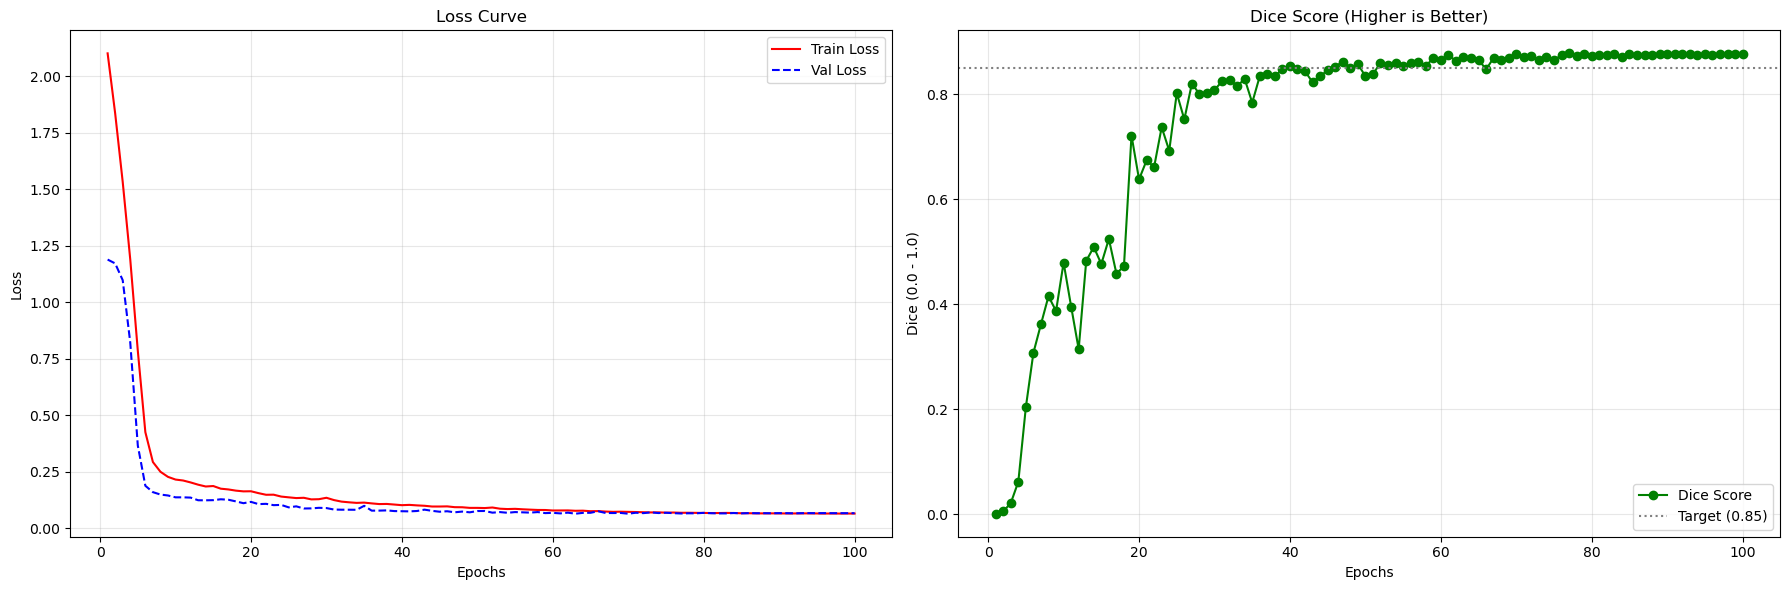

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.cuda.amp import autocast, GradScaler
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from pathlib import Path

# ==========================================
# 1. CONFIGURATION (Safe Mode)
# ==========================================
CONFIG = {
    'model': {
        'in_channels': 4,
        'out_channels': 4,
        'base_channels': 32,      
        'embed_dim': 768,         # Stable Size
        'num_heads': 12,          
        'depth': 6,               # 6 Layers (Prevent Overfitting)
        'patch_size': 16,
    },
    'training': {
        'batch_size': 8,          # 5080 Efficient
        'accumulation_steps': 1,
        'num_epochs': 100,
        
        # --- SAFE LEARNING RATE ---
        'learning_rate': 2e-4,    # Lower base LR to prevent explosion
        'optimizer_params': {'weight_decay': 1e-5}, # Added Weight Decay
        
        'scheduler': 'OneCycleLR',
        # Reduced max_lr to 2e-4 (Safe Peak)
        'scheduler_params': {'max_lr': 2e-4, 'pct_start': 0.3},
        
        'val_interval': 1,
        'loss': {'dice_weight': 1.0, 'focal_weight': 1.0},
        'use_amp': True,
        'deep_supervision': True
    },
    'data': {
        'processed_data_path': './data/processed',
        'num_workers': 8,         # CPU Workers (Lazy Loading)
    },
    'paths': {'log_dir': './logs_safe_final'},
    'augmentation': {'train': {'random_flip_prob': 0.5, 'random_rotate_prob': 0.5}},
    'hardware': {'device': 'cuda'}
}

# ==========================================
# 2. MODEL COMPONENTS
# ==========================================
class DiceFocalLoss(nn.Module):
    def __init__(self, dice_weight=1.0, focal_weight=1.0):
        super(DiceFocalLoss, self).__init__()
        self.dice_weight = dice_weight; self.focal_weight = focal_weight
    def forward(self, inputs, targets, smooth=1):
        ce_loss = F.cross_entropy(inputs, targets.long(), reduction='none')
        pt = torch.exp(-ce_loss); focal_loss = ((1 - pt) ** 2 * ce_loss).mean()
        inputs_soft = F.softmax(inputs, dim=1)
        targets_one_hot = F.one_hot(targets.long(), num_classes=inputs.shape[1]).permute(0, 4, 1, 2, 3).float()
        inputs_flat = inputs_soft.contiguous().view(-1); targets_flat = targets_one_hot.contiguous().view(-1)
        intersection = (inputs_flat * targets_flat).sum()
        dice_loss = 1 - (2. * intersection + smooth) / (inputs_flat.sum() + targets_flat.sum() + smooth)
        return (self.dice_weight * dice_loss) + (self.focal_weight * focal_loss)

class RotaryEmbedding(nn.Module):
    def __init__(self, dim, max_seq_len=20000):
        super().__init__()
        inv_freq = 1.0 / (10000 ** (torch.arange(0, dim, 2).float() / dim))
        self.register_buffer("inv_freq", inv_freq)
        self.max_seq_len = max_seq_len
        self.cached_cos = None; self.cached_sin = None
    def forward(self, x, seq_len):
        if seq_len > self.max_seq_len: self.max_seq_len = seq_len; self.cached_cos = None 
        if self.cached_cos is None or self.cached_cos.size(2) < seq_len:
            t = torch.arange(self.max_seq_len, device=x.device, dtype=self.inv_freq.dtype)
            freqs = torch.einsum("i,j->ij", t, self.inv_freq)
            emb = torch.cat((freqs, freqs), dim=-1)
            self.cached_cos = emb.cos()[None, None, :, :]; self.cached_sin = emb.sin()[None, None, :, :]
        return self.cached_cos[:, :, :seq_len, :], self.cached_sin[:, :, :seq_len, :]

def rotate_half(x): x1, x2 = x.chunk(2, dim=-1); return torch.cat((-x2, x1), dim=-1)
def apply_rotary_pos_emb(q, k, cos, sin): return (q * cos) + (rotate_half(q) * sin), (k * cos) + (rotate_half(k) * sin)

class RoPESelfAttention(nn.Module):
    def __init__(self, dim, num_heads=8, dropout=0.1):
        super().__init__()
        self.num_heads = num_heads; self.head_dim = dim // num_heads; self.scale = self.head_dim ** -0.5
        self.qkv = nn.Linear(dim, dim * 3); self.proj = nn.Linear(dim, dim); self.rope = RotaryEmbedding(self.head_dim)
    def forward(self, x):
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]
        cos, sin = self.rope(q, seq_len=N); q, k = apply_rotary_pos_emb(q, k, cos, sin)
        attn = (q @ k.transpose(-2, -1)) * self.scale; attn = attn.softmax(dim=-1)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        return self.proj(x)

class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads, dropout=0.1):
        super().__init__()
        self.norm1 = nn.LayerNorm(dim); self.attn = RoPESelfAttention(dim, num_heads, dropout)
        self.norm2 = nn.LayerNorm(dim); self.mlp = nn.Sequential(nn.Linear(dim, dim*4), nn.GELU(), nn.Linear(dim*4, dim), nn.Dropout(dropout))
    def forward(self, x): x = x + self.attn(self.norm1(x)); x = x + self.mlp(self.norm2(x)); return x

class UNETR_Advanced(nn.Module):
    def __init__(self, config):
        super().__init__()
        c = config['model']
        self.patch_size = c['patch_size']; self.embed_dim = c['embed_dim']
        self.patch_embed = nn.Conv3d(c['in_channels'], self.embed_dim, kernel_size=self.patch_size, stride=self.patch_size)
        self.blocks = nn.ModuleList([TransformerBlock(self.embed_dim, c['num_heads']) for _ in range(c['depth'])])
        self.up1 = nn.ConvTranspose3d(self.embed_dim, 128, kernel_size=2, stride=2)
        self.up2 = nn.ConvTranspose3d(128, 64, kernel_size=2, stride=2)
        self.up3 = nn.ConvTranspose3d(64, 32, kernel_size=2, stride=2)
        self.up4 = nn.ConvTranspose3d(32, 16, kernel_size=2, stride=2)
        self.out_head = nn.Conv3d(16, c['out_channels'], kernel_size=1)
        self.ds_head1 = nn.Conv3d(32, c['out_channels'], kernel_size=1) 
        self.ds_head2 = nn.Conv3d(64, c['out_channels'], kernel_size=1) 

    def forward(self, x):
        x = self.patch_embed(x).flatten(2).transpose(1, 2)
        for blk in self.blocks: x = blk(x)
        B, N, C = x.shape; D = int(round(N**(1/3)))
        x = x.transpose(1, 2).reshape(B, C, D, D, D)
        x = self.up1(x); x2 = self.up2(x); x3 = self.up3(x2); x4 = self.up4(x3)
        if self.training: return self.out_head(x4), self.ds_head1(x3), self.ds_head2(x2)
        else: return self.out_head(x4)

# ==========================================
# 3. TRAINER
# ==========================================
class Trainer:
    def __init__(self, model, train_loader, val_loader, config):
        self.model = model; self.train_loader = train_loader; self.val_loader = val_loader; self.config = config
        self.device = torch.device(config['hardware']['device'])
        self.criterion = DiceFocalLoss(**config['training']['loss']).to(self.device)
        
        # Safe Optimizer with Weight Decay
        wd = config['training'].get('optimizer_params', {}).get('weight_decay', 0.0)
        self.optimizer = optim.AdamW(model.parameters(), lr=config['training']['learning_rate'], weight_decay=wd)
        
        self.scaler = GradScaler(enabled=config['training']['use_amp'])
        self.writer = SummaryWriter(log_dir=config['paths']['log_dir'])
        self.scheduler = optim.lr_scheduler.OneCycleLR(self.optimizer, max_lr=config['training']['scheduler_params']['max_lr'], 
                                                       epochs=config['training']['num_epochs'], steps_per_epoch=len(train_loader), pct_start=0.3)
        self.best_dice = 0.0; self.history = {'train_loss': [], 'val_loss': [], 'val_dice': []}

    def train_epoch(self, epoch):
        self.model.train()
        total_loss = 0
        pbar = tqdm(self.train_loader, desc=f"Epoch {epoch+1}")
        for i, (imgs, lbls, _) in enumerate(pbar):
            imgs, lbls = imgs.to(self.device), lbls.to(self.device)
            with autocast(enabled=self.config['training']['use_amp']):
                out, aux1, aux2 = self.model(imgs)
                lbls_aux1 = F.interpolate(lbls.float().unsqueeze(1), size=aux1.shape[2:], mode='nearest').squeeze(1).long()
                lbls_aux2 = F.interpolate(lbls.float().unsqueeze(1), size=aux2.shape[2:], mode='nearest').squeeze(1).long()
                loss = self.criterion(out, lbls) + 0.5 * self.criterion(aux1, lbls_aux1) + 0.25 * self.criterion(aux2, lbls_aux2)
                loss = loss / self.config['training']['accumulation_steps']
            self.scaler.scale(loss).backward()
            if (i+1) % self.config['training']['accumulation_steps'] == 0:
                self.scaler.step(self.optimizer); self.scaler.update(); self.optimizer.zero_grad(); self.scheduler.step()
            total_loss += loss.item() * self.config['training']['accumulation_steps']
            pbar.set_postfix({'loss': f"{total_loss/(i+1):.4f}"})
        avg_loss = total_loss/len(self.train_loader)
        self.writer.add_scalar('Loss/Train', avg_loss, epoch)
        return avg_loss

    def validate(self, epoch):
        self.model.eval()
        dice_scores = []; val_loss = 0
        with torch.no_grad():
            for imgs, lbls, _ in self.val_loader:
                imgs, lbls = imgs.to(self.device), lbls.to(self.device)
                with autocast(enabled=self.config['training']['use_amp']):
                    out = self.model(imgs)
                    val_loss += self.criterion(out, lbls).item()
                pred = out.argmax(1)
                inter = ((pred>0)*(lbls>0)).sum(); union = (pred>0).sum() + (lbls>0).sum()
                dice = (2.0*inter + 1e-5)/(union + 1e-5); dice_scores.append(dice.item())
        avg_dice = np.mean(dice_scores); avg_loss = val_loss / len(self.val_loader)
        self.writer.add_scalar('Loss/Val', avg_loss, epoch); self.writer.add_scalar('Metric/Dice', avg_dice, epoch)
        return avg_loss, avg_dice

    def run(self):
        val_int = self.config['training']['val_interval']
        for epoch in range(self.config['training']['num_epochs']):
            tl = self.train_epoch(epoch)
            self.history['train_loss'].append(tl)
            if (epoch+1) % val_int == 0:
                vl, vd = self.validate(epoch)
                self.history['val_loss'].append(vl); self.history['val_dice'].append(vd)
                print(f"📊 Epoch {epoch+1}: Loss={tl:.4f} | Val Dice={vd:.4f}")
                if vd > self.best_dice:
                    self.best_dice = vd; torch.save(self.model.state_dict(), f"best_safe_model.pth")
            else:
                self.history['val_loss'].append(self.history['val_loss'][-1] if self.history['val_loss'] else 0)
                self.history['val_dice'].append(self.history['val_dice'][-1] if self.history['val_dice'] else 0)
        self.writer.close(); return self.history

# ==========================================
# 4. PLOTTING & EXECUTION
# ==========================================
def summary_check(model, train_loader, val_loader, config):
    print("\n" + "="*45 + "\n📋 TRAINING SUMMARY\n" + "="*45)
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"✅ Model: UNETR (Balanced) | Params: {params:,}")
    print(f"✅ Data: {len(train_loader)} Batches | Workers: {config['data']['num_workers']} (Disk IO)")
    print(f"✅ Config: Max LR={config['training']['scheduler_params']['max_lr']} (Safe)")
    print("="*45 + "\n")

def plot_results(history):
    if not history or 'train_loss' not in history: return
    epochs = range(1, len(history['train_loss']) + 1)
    plt.figure(figsize=(18, 6))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], 'r-', label='Train Loss')
    plt.plot(epochs, history['val_loss'], 'b--', label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs'); plt.ylabel('Loss')
    plt.legend(); plt.grid(True, alpha=0.3)
    
    # Dice Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['val_dice'], 'g-o', label='Dice Score')
    plt.title('Dice Score (Higher is Better)')
    plt.xlabel('Epochs'); plt.ylabel('Dice (0.0 - 1.0)')
    plt.axhline(y=0.85, color='gray', linestyle=':', label='Target (0.85)')
    plt.legend(); plt.grid(True, alpha=0.3)
    
    plt.tight_layout(); plt.show()

if __name__ == "__main__":
    from brats_utils import BraTSDataset, BraTSAugmentation 
    print("🚀 Initializing Safe Training...")
    
    device = torch.device(CONFIG['hardware']['device'])
    model = UNETR_Advanced(CONFIG).to(device)
    
    data_path = Path(CONFIG['data']['processed_data_path'])
    all_ids = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
    train_ids, val_ids = train_test_split(all_ids, test_size=0.2, random_state=42)
    
    def get_loader(split, ids):
        aug = BraTSAugmentation(**CONFIG['augmentation']['train']) if split=='train' else None
        ds = BraTSDataset(data_path, ids, transform=aug, cache=False) 
        return DataLoader(ds, batch_size=CONFIG['training']['batch_size'], shuffle=(split=='train'), num_workers=8, pin_memory=True)
    
    train_loader = get_loader('train', train_ids)
    val_loader = get_loader('val', val_ids)
    
    summary_check(model, train_loader, val_loader, CONFIG)
    
    print("✅ Starting Trainer (Plot will appear at the end)...")
    trainer = Trainer(model, train_loader, val_loader, CONFIG)
    try:
        history = trainer.run()
        plot_results(history)
    except KeyboardInterrupt:
        print("🛑 Stopped.")
        plot_results(trainer.history)

🧠 Generating Tumor Map...


C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\4011307825.py:12: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


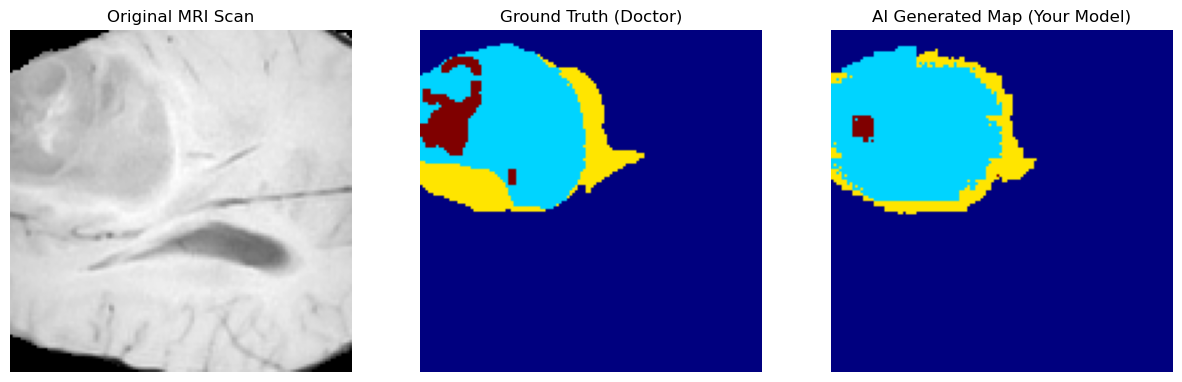

In [3]:
import matplotlib.pyplot as plt
import torch

def show_tumor_map(model, loader, device):
    model.eval()
    with torch.no_grad():
        # 1. Get a random patient from the validation list
        img, mask, _ = next(iter(loader))
        img, mask = img.to(device), mask.to(device)
        
        # 2. Ask the model to generate the map
        with torch.cuda.amp.autocast():
            output = model(img)
            # Handle deep supervision tuple
            if isinstance(output, tuple): output = output[0]
            # Convert probability to class map (0, 1, 2, 3)
            prediction_map = output.argmax(dim=1)

        # 3. Pick a slice (e.g., Slice 70 out of 128)
        slice_idx = 70
        
        # Prepare for plotting
        img_slice = img[0, 0, :, :, slice_idx].cpu().numpy()  # T1 MRI
        true_map = mask[0, :, :, slice_idx].cpu().numpy()     # Doctor's Map
        pred_map = prediction_map[0, :, :, slice_idx].cpu().numpy() # AI's Map

        # 4. Plot
        plt.figure(figsize=(15, 5))
        
        plt.subplot(1, 3, 1)
        plt.imshow(img_slice, cmap='gray')
        plt.title("Original MRI Scan")
        plt.axis('off')
        
        plt.subplot(1, 3, 2)
        plt.imshow(true_map, cmap='jet', vmin=0, vmax=3)
        plt.title("Ground Truth (Doctor)")
        plt.axis('off')
        
        plt.subplot(1, 3, 3)
        plt.imshow(pred_map, cmap='jet', vmin=0, vmax=3)
        plt.title(f"AI Generated Map (Your Model)")
        plt.axis('off')
        
        plt.show()

# Run visualization
# (Make sure 'model' and 'val_loader' are defined from your training cell)
if 'model' in locals():
    print("🧠 Generating Tumor Map...")
    show_tumor_map(model, val_loader, device)

In [10]:
import gradio as gr
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import io
from PIL import Image
import nibabel as nib

# ==========================================
# 1. SETUP
# ==========================================
device = torch.device(CONFIG['hardware']['device'])
if 'model' not in locals():
    model = UNETR_Advanced(CONFIG).to(device)
    
if Path("best_safe_model.pth").exists():
    model.load_state_dict(torch.load("best_safe_model.pth", map_location=device))
model.eval()

data_path = Path(CONFIG['data']['processed_data_path'])
patient_ids = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
demo_patients = patient_ids[:20] 

# ==========================================
# 2. HELPER: SMART TUMOR LOCATOR
# ==========================================
def find_tumor_center(case_id):
    """
    Scans the patient to find which slice has the biggest tumor.
    Returns the Slice Index to update the slider automatically.
    """
    # Load data (Lazy)
    ds = BraTSDataset(data_path, [case_id], transform=None, cache=False)
    input_tensor, _, _ = ds[0]
    input_tensor = input_tensor.unsqueeze(0).to(device)

    # Quick Inference
    with torch.no_grad():
        with torch.cuda.amp.autocast():
            logits = model(input_tensor)
            if isinstance(logits, tuple): logits = logits[0]
            pred_mask = logits.argmax(dim=1).cpu().numpy()[0] # (128, 128, 128)

    # Find which slice has the most tumor pixels (>0)
    # We sum along the height/width axes (0 and 1) to get a count per slice (axis 2)
    tumor_counts = np.sum(pred_mask > 0, axis=(0, 1))
    
    # Find the index of the max value
    best_slice = int(np.argmax(tumor_counts))
    
    # If no tumor found at all, default to middle
    if np.max(tumor_counts) == 0:
        return 64, "⚠️ No Tumor Detected in this patient."
        
    return best_slice, f"✅ Tumor found! Auto-jumped to Slice {best_slice} (Largest Area)."

# ==========================================
# 3. ANALYSIS ENGINE (Same as before)
# ==========================================
def predict_and_score(case_id, slice_idx, location_msg=""):
    # Load Data
    case_path = data_path / case_id
    t1ce_path = case_path / f"{case_id}_t1ce.nii.gz"
    seg_path = case_path / f"{case_id}_seg.nii.gz"
    
    vol = nib.load(str(t1ce_path)).get_fdata().astype(np.float32)
    vol = (vol - vol.min()) / (vol.max() - vol.min())
    img_slice = vol[:, :, int(slice_idx)]

    true_mask = None
    if seg_path.exists():
        true_mask = nib.load(str(seg_path)).get_fdata().astype(np.longlong)

    # Inference
    ds = BraTSDataset(data_path, [case_id], transform=None, cache=False)
    input_tensor, _, _ = ds[0]
    input_tensor = input_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        with torch.cuda.amp.autocast():
            logits = model(input_tensor)
            if isinstance(logits, tuple): logits = logits[0]
            probs = torch.softmax(logits, dim=1)
            pred_mask = logits.argmax(dim=1).cpu().numpy()[0]
            conf_score = probs.max(dim=1)[0].mean().item() * 100

    # Metrics
    # Calculate Dice
    def calc_dice(p, t):
        if t is None: return 0.0
        p_f = (p.flatten() > 0).astype(float); t_f = (t.flatten() > 0).astype(float)
        return (2. * (p_f * t_f).sum() + 1e-5) / (p_f.sum() + t_f.sum() + 1e-5)
    
    dice_score = calc_dice(pred_mask, true_mask) * 100
    
    # Classification
    tumor_voxels = np.sum(pred_mask > 0)
    enhancing_voxels = np.sum(pred_mask == 3)
    
    if tumor_voxels < 100:
        diagnosis = "✅ No Tumor"; color = "green"
    elif enhancing_voxels > 500:
        diagnosis = "⚠️ High-Grade Glioma"; color = "red"
    else:
        diagnosis = "⚠️ Low-Grade Glioma"; color = "orange"

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot 1: AI
    ax1.imshow(img_slice, cmap='gray')
    ax1.set_title(f"AI Prediction (Slice {slice_idx})")
    ax1.axis('off')
    mask_ai = pred_mask[:, :, int(slice_idx)]
    if np.sum(mask_ai) > 0:
        ov = np.zeros((*mask_ai.shape, 4))
        ov[mask_ai==1]=[1,0,0,0.6]; ov[mask_ai==2]=[0,1,0,0.3]; ov[mask_ai==3]=[0,0,1,0.8]
        ax1.imshow(ov)

    # Plot 2: Doctor
    ax2.imshow(img_slice, cmap='gray')
    ax2.set_title("Ground Truth")
    ax2.axis('off')
    if true_mask is not None:
        mask_gt = true_mask[:, :, int(slice_idx)]
        if np.sum(mask_gt) > 0:
            ov_gt = np.zeros((*mask_gt.shape, 4))
            ov_gt[mask_gt==1]=[1,0,0,0.6]; ov_gt[mask_gt==2]=[0,1,0,0.3]; ov_gt[mask_gt==3]=[0,0,1,0.8]
            ax2.imshow(ov_gt)

    buf = io.BytesIO(); plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0); buf.seek(0)
    out_img = Image.open(buf); plt.close(fig)

    # Report
    report_html = f"""
    <div style="background-color: #2b2b40; padding: 15px; border-radius: 10px; color: white; border-left: 5px solid {color};">
        <h2 style="margin:0; color:{color};">{diagnosis}</h2>
        <p style="color: #bbb; font-size: 14px; margin-top: 5px;">{location_msg}</p>
        <hr style="border-color: #555;">
        <div style="display: flex; justify-content: space-between;">
            <div>
                <p><b>📊 Prediction Score:</b> {conf_score:.2f}%</p>
                <p><b>🎯 Dice Score:</b> {dice_score:.2f}%</p>
            </div>
            <div>
                 <p><b>Volume:</b> {tumor_voxels} voxels</p>
                 <p><b>Slice Index:</b> {slice_idx}</p>
            </div>
        </div>
    </div>
    """
    return out_img, report_html

# ==========================================
# 4. LAUNCH APP
# ==========================================
with gr.Blocks(theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🧠 NeuroSeg Pro: Auto-Locate Tumor")
    gr.Markdown("Select a patient. The AI will **automatically find the slice** with the largest tumor.")
    
    with gr.Row():
        with gr.Column(scale=1):
            dd_patient = gr.Dropdown(choices=demo_patients, label="Select Patient Case", value=demo_patients[0])
            slider_slice = gr.Slider(0, 127, value=64, step=1, label="Z-Axis Slice (Auto-Updates)")
            # Hidden state to pass the "Auto-jump" message
            msg_state = gr.State(value="") 
            
            btn_run = gr.Button("Re-Analyze Slice", variant="secondary")
        
        with gr.Column(scale=2):
            out_plot = gr.Image(type="pil", label="Comparison")
            out_report = gr.HTML(label="Diagnostic Metrics")

    # --- THE CHAIN REACTION ---
    # 1. When Patient changes -> Find Center -> Update Slider & Message State
    dd_patient.change(fn=find_tumor_center, inputs=[dd_patient], outputs=[slider_slice, msg_state])
    
    # 2. When Slider changes (either by user or by Step 1) -> Update Plot/Report
    slider_slice.change(fn=predict_and_score, inputs=[dd_patient, slider_slice, msg_state], outputs=[out_plot, out_report])
    
    # 3. Button just triggers a refresh
    btn_run.click(fn=predict_and_score, inputs=[dd_patient, slider_slice, msg_state], outputs=[out_plot, out_report])

print("🚀 Launching Smart Dashboard...")
demo.launch(share=True)

C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\3790716568.py:158: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(theme=gr.themes.Soft()) as demo:


🚀 Launching Smart Dashboard...
* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://3632836bb389130b94.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [5]:
# 1. Load the TensorBoard notebook extension
%load_ext tensorboard

# 2. Launch TensorBoard
# Note: If you changed the log_dir in CONFIG, update it here too.
%tensorboard --logdir ./logs_safe_final

In [6]:
# Run this AFTER training finishes to load the champion model
model.load_state_dict(torch.load("best_safe_model.pth"))
print("🏆 Loaded the Best Model from disk!")

🏆 Loaded the Best Model from disk!


🧐 Inspection Case: BraTS20_Training_114
🌊 Image Max Value: 11.9559 (Must be > 0)
🎯 Label Unique Vals: tensor([0, 1, 2, 3])


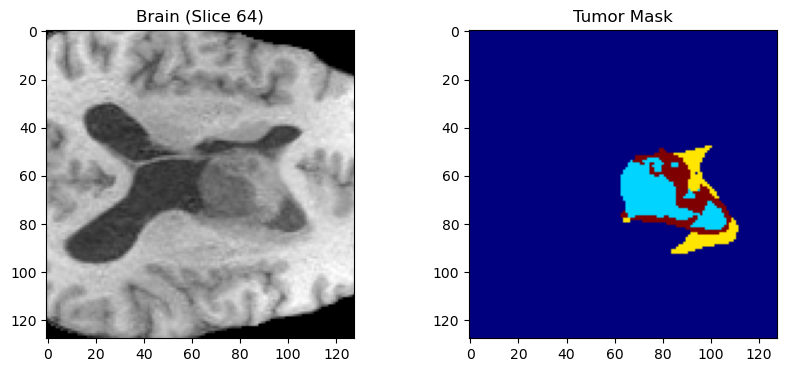

In [11]:
# --- INSTANT DATA CHECK ---
import matplotlib.pyplot as plt
import torch

# grab one batch
imgs, lbls, ids = next(iter(train_loader))

print(f"🧐 Inspection Case: {ids[0]}")
print(f"🌊 Image Max Value: {imgs.max().item():.4f} (Must be > 0)")
print(f"🎯 Label Unique Vals: {torch.unique(lbls)}")

# Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(imgs[0,0,:,:,64].cpu(), cmap='gray'); plt.title("Brain (Slice 64)")
plt.subplot(1,2,2); plt.imshow(lbls[0,:,:,64].cpu(), cmap='jet'); plt.title("Tumor Mask")
plt.show()

if imgs.max().item() == 0:
    print("🚨 FATAL ERROR: Your Data Loader is returning BLACK IMAGES.")
    print("   Fix your 'processed_data_path' in CONFIG.")

🏆 Loaded 'best_safe_model.pth' successfully!

🧠 SMART ANALYSIS: BraTS20_Training_278


C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\3844792516.py:80: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\3844792516.py:141: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\3844792516.py:141: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ragey\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ragey\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128104 (\N{MAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


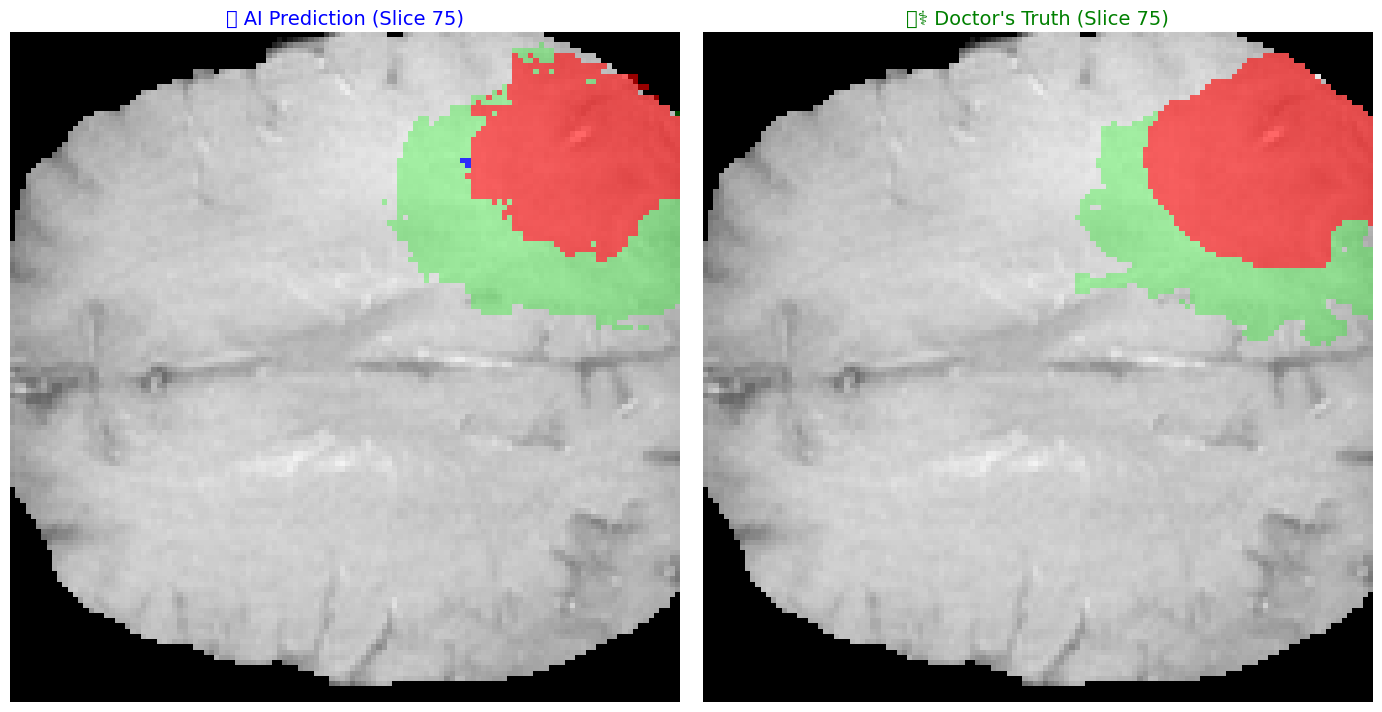

📋 DIAGNOSTIC REPORT
------------------------------
Diagnosis       : ⚠️ HIGH-GRADE GLIOMA (Aggressive)
Auto-Location   : Found at slice 75 (Largest Area)
Prediction Conf : 97.83% (How sure the AI is)
Dice Score      : 89.37% (Overlap with Doctor)
------------------------------
Total Volume    : 93725 voxels
Aggressive Vol  : 1060 voxels



In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib
import random

# ==========================================
# 1. SETUP & LOAD MODEL
# ==========================================
device = torch.device(CONFIG['hardware']['device'])

# Initialize Model if not already done
if 'model' not in locals():
    model = UNETR_Advanced(CONFIG).to(device)

# Load the Best Weights
if Path("best_safe_model.pth").exists():
    model.load_state_dict(torch.load("best_safe_model.pth", map_location=device))
    print("🏆 Loaded 'best_safe_model.pth' successfully!")
else:
    print("⚠️ Warning: Saved model not found. Using current memory weights.")

model.eval()

# ==========================================
# 2. HELPER FUNCTIONS
# ==========================================
def calculate_dice(pred, target):
    """Computes Dice Score between two 3D volumes"""
    if target is None: return 0.0
    smooth = 1e-5
    p_flat = (pred.flatten() > 0).astype(float) # Convert to binary mask (Tumor vs No Tumor)
    t_flat = (target.flatten() > 0).astype(float)
    intersection = (p_flat * t_flat).sum()
    return (2. * intersection + smooth) / (p_flat.sum() + t_flat.sum() + smooth)

def get_smart_slice_index(pred_mask):
    """Finds the slice index (0-127) with the largest tumor area"""
    # Sum pixels along height/width (axes 0, 1) to get count per slice
    tumor_counts_per_slice = np.sum(pred_mask > 0, axis=(0, 1))
    max_slice_idx = int(np.argmax(tumor_counts_per_slice))
    
    # If brain is empty (no tumor found), return middle slice
    if np.max(tumor_counts_per_slice) == 0:
        return 64, False
    return max_slice_idx, True

# ==========================================
# 3. MAIN ANALYZER FUNCTION
# ==========================================
def analyze_patient_smart(case_id):
    print(f"\n" + "="*60)
    print(f"🧠 SMART ANALYSIS: {case_id}")
    print("="*60)

    # --- A. Load Data ---
    data_path = Path(CONFIG['data']['processed_data_path'])
    case_path = data_path / case_id
    
    # Load T1ce (for visualization)
    t1ce_path = case_path / f"{case_id}_t1ce.nii.gz"
    vol = nib.load(str(t1ce_path)).get_fdata().astype(np.float32)
    # Normalize 0-1
    vol = (vol - vol.min()) / (vol.max() - vol.min()) 
    
    # Load Ground Truth (if exists)
    seg_path = case_path / f"{case_id}_seg.nii.gz"
    true_mask = None
    if seg_path.exists():
        true_mask = nib.load(str(seg_path)).get_fdata().astype(np.longlong)

    # --- B. AI Inference ---
    # Use Dataset class just to get the tensor correctly formatted
    ds = BraTSDataset(data_path, [case_id], transform=None, cache=False)
    input_tensor, _, _ = ds[0]
    input_tensor = input_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        with torch.cuda.amp.autocast():
            logits = model(input_tensor)
            if isinstance(logits, tuple): logits = logits[0]
            
            # Get Probabilities & Mask
            probs = torch.softmax(logits, dim=1)
            pred_mask = logits.argmax(dim=1).cpu().numpy()[0]
            
            # Confidence Score
            conf_score = probs.max(dim=1)[0].mean().item() * 100

    # --- C. Smart Slice Locator ---
    best_slice, tumor_found = get_smart_slice_index(pred_mask)
    location_msg = f"slice {best_slice} (Largest Area)" if tumor_found else "slice 64 (Default - No Tumor Found)"

    # --- D. Metrics & Classification ---
    dice_score = calculate_dice(pred_mask, true_mask) * 100
    
    tumor_voxels = np.sum(pred_mask > 0)
    enhancing_voxels = np.sum(pred_mask == 3) # Label 3 is Aggressive
    
    if tumor_voxels < 100:
        diagnosis = "✅ No Tumor Detected"
        color = 'green'
    elif enhancing_voxels > 500:
        diagnosis = "⚠️ HIGH-GRADE GLIOMA (Aggressive)"
        color = 'red'
    else:
        diagnosis = "⚠️ LOW-GRADE GLIOMA"
        color = 'orange'

    # --- E. Visualization ---
    img_slice = vol[:, :, best_slice]
    mask_ai = pred_mask[:, :, best_slice]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
    
    # Left: AI Prediction
    ax1.imshow(img_slice, cmap='gray')
    ax1.set_title(f"🤖 AI Prediction (Slice {best_slice})", fontsize=14, color='blue')
    ax1.axis('off')
    if np.sum(mask_ai) > 0:
        ov = np.zeros((*mask_ai.shape, 4))
        ov[mask_ai==1] = [1, 0, 0, 0.6] # Red (Core)
        ov[mask_ai==2] = [0, 1, 0, 0.3] # Green (Edema)
        ov[mask_ai==3] = [0, 0, 1, 0.8] # Blue (Enhancing)
        ax1.imshow(ov)

    # Right: Ground Truth
    ax2.imshow(img_slice, cmap='gray')
    ax2.set_title(f"👨‍⚕️ Doctor's Truth (Slice {best_slice})", fontsize=14, color='green')
    ax2.axis('off')
    if true_mask is not None:
        mask_gt = true_mask[:, :, best_slice]
        if np.sum(mask_gt) > 0:
            ov_gt = np.zeros((*mask_gt.shape, 4))
            ov_gt[mask_gt==1] = [1, 0, 0, 0.6]
            ov_gt[mask_gt==2] = [0, 1, 0, 0.3]
            ov_gt[mask_gt==3] = [0, 0, 1, 0.8]
            ax2.imshow(ov_gt)
            
    plt.tight_layout()
    plt.show()

    # --- F. Print Report ---
    print(f"📋 DIAGNOSTIC REPORT")
    print("-" * 30)
    print(f"Diagnosis       : {diagnosis}")
    print(f"Auto-Location   : Found at {location_msg}")
    print(f"Prediction Conf : {conf_score:.2f}% (How sure the AI is)")
    print(f"Dice Score      : {dice_score:.2f}% (Overlap with Doctor)")
    print("-" * 30)
    print(f"Total Volume    : {tumor_voxels} voxels")
    print(f"Aggressive Vol  : {enhancing_voxels} voxels")
    print("="*60 + "\n")

# ==========================================
# 4. RUN ON A RANDOM PATIENT
# ==========================================
# Get list of validation patients
data_path = Path(CONFIG['data']['processed_data_path'])
all_cases = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
random_patient = random.choice(all_cases)

# Execute!
analyze_patient_smart(random_patient)

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib
import ipywidgets as widgets # <--- NEW IMPORT
from IPython.display import display

# ==========================================
# 1. SETUP & MODEL LOADING
# ==========================================
device = torch.device(CONFIG['hardware']['device'])

if 'model' not in locals():
    model = UNETR_Advanced(CONFIG).to(device)

if Path("best_safe_model.pth").exists():
    model.load_state_dict(torch.load("best_safe_model.pth", map_location=device))
    print("🏆 Loaded 'best_safe_model.pth'")
else:
    print("⚠️ Using current model weights (Save file not found)")

model.eval()

# ==========================================
# 2. CORE ANALYSIS FUNCTION
# ==========================================
def analyze_patient_smart(case_id):
    """
    Analyzes a specific patient ID: finds tumor, calculates dice, plots result.
    """
    # --- A. Load Data ---
    data_path = Path(CONFIG['data']['processed_data_path'])
    case_path = data_path / case_id
    
    t1ce_path = case_path / f"{case_id}_t1ce.nii.gz"
    seg_path = case_path / f"{case_id}_seg.nii.gz"
    
    # Load Image
    vol = nib.load(str(t1ce_path)).get_fdata().astype(np.float32)
    vol = (vol - vol.min()) / (vol.max() - vol.min()) 
    
    # Load Truth (if exists)
    true_mask = None
    if seg_path.exists():
        true_mask = nib.load(str(seg_path)).get_fdata().astype(np.longlong)

    # --- B. AI Inference ---
    ds = BraTSDataset(data_path, [case_id], transform=None, cache=False)
    input_tensor, _, _ = ds[0]
    input_tensor = input_tensor.unsqueeze(0).to(device)

    with torch.no_grad():
        with torch.cuda.amp.autocast():
            logits = model(input_tensor)
            if isinstance(logits, tuple): logits = logits[0]
            probs = torch.softmax(logits, dim=1)
            pred_mask = logits.argmax(dim=1).cpu().numpy()[0]
            conf_score = probs.max(dim=1)[0].mean().item() * 100

    # --- C. Smart Slice Finder ---
    # Find slice with most tumor pixels
    counts = np.sum(pred_mask > 0, axis=(0, 1))
    best_slice = int(np.argmax(counts))
    has_tumor = np.max(counts) > 0
    if not has_tumor: best_slice = 64 # Default center if empty

    # --- D. Metrics ---
    # Dice Calculation
    dice_score = 0.0
    if true_mask is not None:
        p_f = (pred_mask.flatten() > 0).astype(float)
        t_f = (true_mask.flatten() > 0).astype(float)
        dice_score = (2. * (p_f * t_f).sum() + 1e-5) / (p_f.sum() + t_f.sum() + 1e-5) * 100

    # Classification
    tumor_voxels = np.sum(pred_mask > 0)
    enhancing_voxels = np.sum(pred_mask == 3)
    
    if tumor_voxels < 100:
        diagnosis = "✅ No Tumor"; color = 'green'
    elif enhancing_voxels > 500:
        diagnosis = "⚠️ HIGH-GRADE GLIOMA"; color = 'red'
    else:
        diagnosis = "⚠️ LOW-GRADE GLIOMA"; color = 'orange'

    # --- E. Plotting ---
    img_slice = vol[:, :, best_slice]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot AI
    ax1.imshow(img_slice, cmap='gray')
    ax1.set_title(f"AI Prediction (Slice {best_slice})", color='blue', fontsize=12)
    ax1.axis('off')
    if has_tumor:
        m = pred_mask[:, :, best_slice]
        ov = np.zeros((*m.shape, 4))
        ov[m==1]=[1,0,0,0.6]; ov[m==2]=[0,1,0,0.3]; ov[m==3]=[0,0,1,0.8]
        ax1.imshow(ov)

    # Plot Truth
    ax2.imshow(img_slice, cmap='gray')
    ax2.set_title("Ground Truth", color='green', fontsize=12)
    ax2.axis('off')
    if true_mask is not None:
        m_gt = true_mask[:, :, best_slice]
        if np.sum(m_gt) > 0:
            ov_gt = np.zeros((*m_gt.shape, 4))
            ov_gt[m_gt==1]=[1,0,0,0.6]; ov_gt[m_gt==2]=[0,1,0,0.3]; ov_gt[m_gt==3]=[0,0,1,0.8]
            ax2.imshow(ov_gt)

    plt.tight_layout()
    plt.show()

    # --- F. Text Report ---
    print(f"📊 REPORT FOR {case_id}")
    print(f"Diagnosis   : {diagnosis}")
    print(f"Slice Found : {best_slice} (Largest Tumor Area)")
    print(f"Confidence  : {conf_score:.2f}%")
    print(f"Dice Score  : {dice_score:.2f}%")
    print(f"Tumor Vol   : {tumor_voxels} voxels")

# ==========================================
# 3. INTERACTIVE DROPDOWN
# ==========================================
# Get list of all patient folders
data_path = Path(CONFIG['data']['processed_data_path'])
all_patients = sorted([d.name for d in data_path.iterdir() if d.is_dir()])

print("⬇️ Select a patient from the dropdown below:")

# Create the Dropdown Widget
widgets.interact(analyze_patient_smart, case_id=widgets.Dropdown(
    options=all_patients,
    description='Patient:',
    disabled=False,
));

🏆 Loaded 'best_safe_model.pth'
⬇️ Select a patient from the dropdown below:


interactive(children=(Dropdown(description='Patient:', options=('BraTS20_Training_001', 'BraTS20_Training_002'…

🚀 Generating Grid for 15 Patients... Please wait.


C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\1963556788.py:66: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():


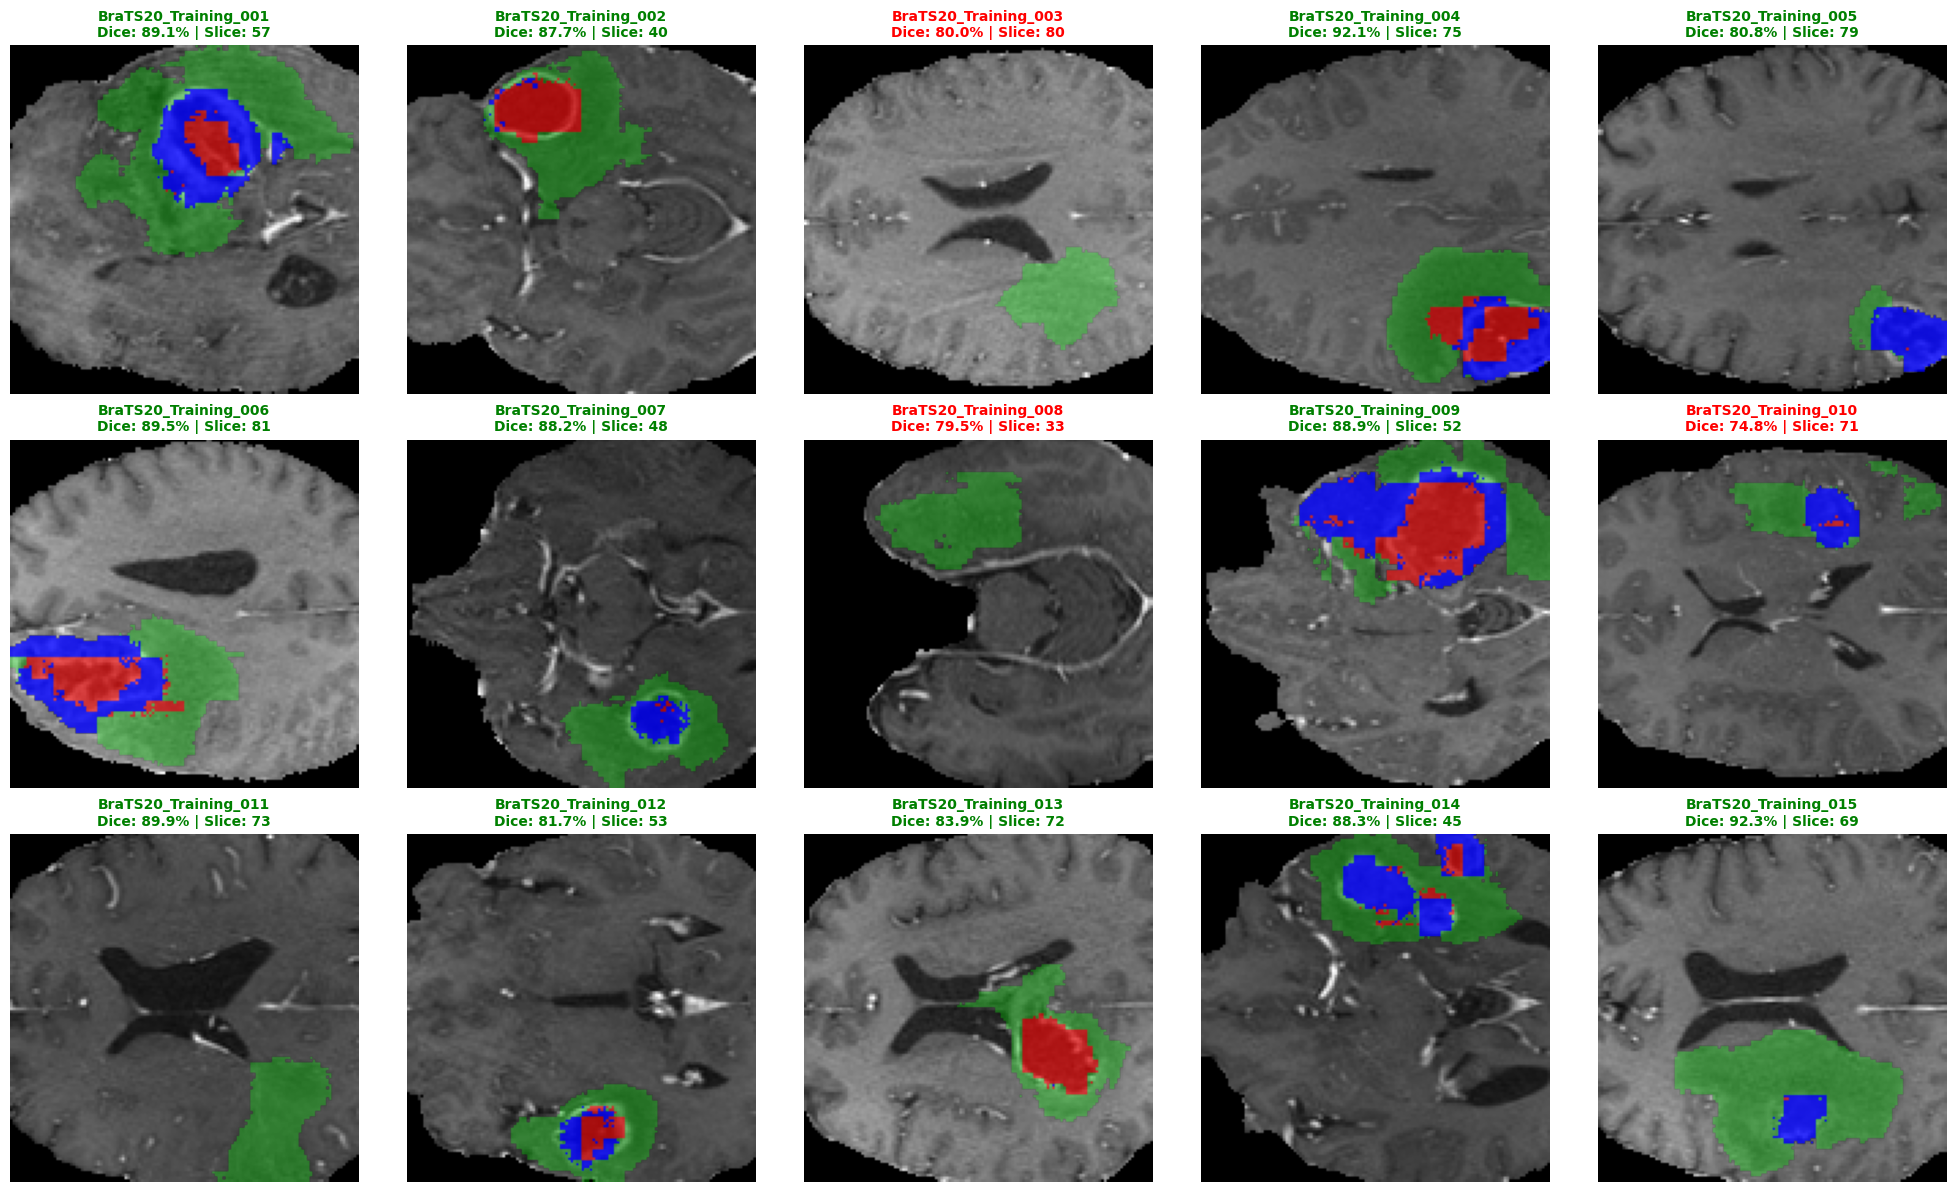

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib
import math

# ==========================================
# 1. SETUP
# ==========================================
device = torch.device(CONFIG['hardware']['device'])
if 'model' not in locals():
    model = UNETR_Advanced(CONFIG).to(device)
    if Path("best_safe_model.pth").exists():
        model.load_state_dict(torch.load("best_safe_model.pth", map_location=device))
model.eval()

# ==========================================
# 2. BATCH GRID FUNCTION
# ==========================================
def show_patient_grid(num_patients=15):
    """
    Displays a grid of patients (default 3x5 = 15).
    Each cell shows the 'Best Slice' (largest tumor) + Dice Score.
    """
    # Get all patient IDs
    data_path = Path(CONFIG['data']['processed_data_path'])
    all_patients = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
    
    # Select the first N patients (or shuffle if you want random ones)
    # random.shuffle(all_patients) # Uncomment to randomize
    batch_ids = all_patients[:num_patients]
    
    # Calculate grid dimensions (e.g., 5 cols)
    cols = 5
    rows = math.ceil(len(batch_ids) / cols)
    
    print(f"🚀 Generating Grid for {len(batch_ids)} Patients... Please wait.")
    
    fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows))
    axes = axes.flatten() # Flatten 2D grid to 1D list for easy looping
    
    for idx, case_id in enumerate(batch_ids):
        ax = axes[idx]
        
        # --- A. Load Data (Lazy) ---
        case_path = data_path / case_id
        t1ce_path = case_path / f"{case_id}_t1ce.nii.gz"
        seg_path = case_path / f"{case_id}_seg.nii.gz"
        
        # Load Image
        vol = nib.load(str(t1ce_path)).get_fdata().astype(np.float32)
        vol = (vol - vol.min()) / (vol.max() - vol.min()) # Normalize
        
        # Load Ground Truth (for Dice calculation)
        true_mask = None
        if seg_path.exists():
            true_mask = nib.load(str(seg_path)).get_fdata().astype(np.longlong)
            
        # --- B. AI Inference ---
        ds = BraTSDataset(data_path, [case_id], transform=None, cache=False)
        input_tensor, _, _ = ds[0]
        input_tensor = input_tensor.unsqueeze(0).to(device)

        with torch.no_grad():
            with torch.cuda.amp.autocast():
                logits = model(input_tensor)
                if isinstance(logits, tuple): logits = logits[0]
                pred_mask = logits.argmax(dim=1).cpu().numpy()[0]

        # --- C. Find Best Slice ---
        # Sum pixels to find slice with most tumor
        counts = np.sum(pred_mask > 0, axis=(0, 1))
        best_slice = int(np.argmax(counts))
        if np.max(counts) == 0: best_slice = 64 # Default if empty

        # --- D. Calculate Dice ---
        dice_score = 0.0
        if true_mask is not None:
            p_f = (pred_mask.flatten() > 0).astype(float)
            t_f = (true_mask.flatten() > 0).astype(float)
            dice_score = (2. * (p_f * t_f).sum() + 1e-5) / (p_f.sum() + t_f.sum() + 1e-5) * 100

        # --- E. Visualization ---
        img_slice = vol[:, :, best_slice]
        mask_slice = pred_mask[:, :, best_slice]
        
        ax.imshow(img_slice, cmap='gray')
        
        # Color Overlay
        if np.sum(mask_slice) > 0:
            ov = np.zeros((*mask_slice.shape, 4))
            ov[mask_slice==1] = [1, 0, 0, 0.6] # Red (Core)
            ov[mask_slice==2] = [0, 1, 0, 0.3] # Green (Edema)
            ov[mask_slice==3] = [0, 0, 1, 0.8] # Blue (Enhancing)
            ax.imshow(ov)
            
        # Title Logic (Green if Good Dice, Red if Bad)
        title_color = 'green' if dice_score > 80 else 'red'
        ax.set_title(f"{case_id}\nDice: {dice_score:.1f}% | Slice: {best_slice}", 
                     color=title_color, fontsize=10, fontweight='bold')
        ax.axis('off')

    # Turn off any empty subplots (if patients < grid spots)
    for i in range(len(batch_ids), len(axes)):
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

# ==========================================
# 3. RUN IT
# ==========================================
show_patient_grid(15)

📊 Starting Full Evaluation (This may take a minute)...


Scanning Patients:   0%|                                                                        | 0/10 [00:00<?, ?it/s]C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\2981540873.py:71: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Scanning Patients: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.32it/s]


📈 DETAILED PERFORMANCE METRICS
                   IoU   Dice  Sensitivity (Recall)  Specificity  Precision
Class                                                                      
Necrotic Core   0.4427 0.6137                0.5244       0.9980     0.7397
Edema           0.5980 0.7484                0.7494       0.9926     0.7475
Enhancing Tumor 0.4855 0.6536                0.6413       0.9972     0.6665
--------------------------------------------------
🏆 Average Dice Score: 0.6719
--------------------------------------------------


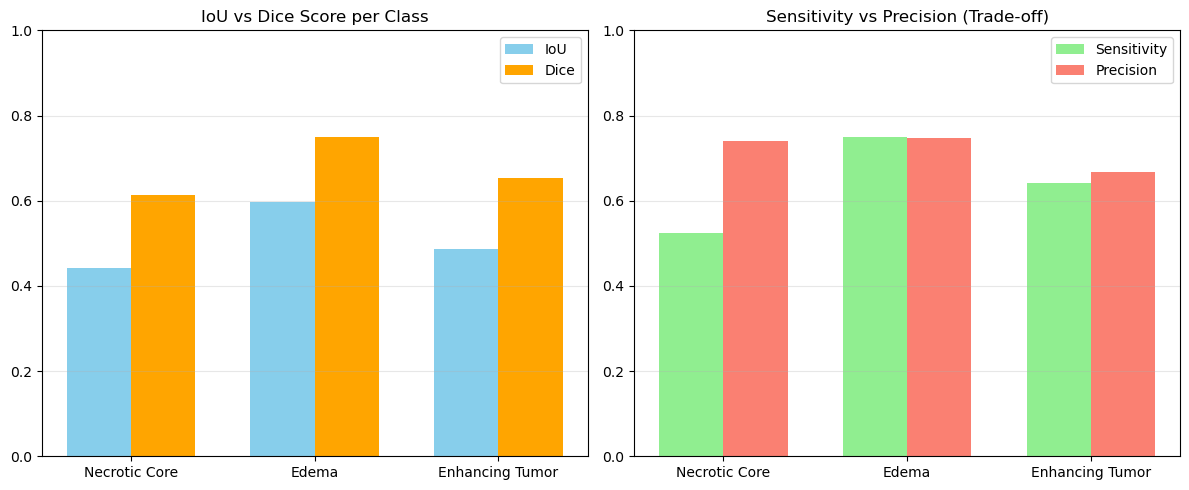

In [21]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from torch.utils.data import DataLoader

# ==========================================
# 1. SETUP & HELPER FUNCTIONS
# ==========================================
device = torch.device(CONFIG['hardware']['device'])

# Re-load Best Model
if 'model' not in locals():
    model = UNETR_Advanced(CONFIG).to(device)
if Path("best_safe_model.pth").exists():
    model.load_state_dict(torch.load("best_safe_model.pth", map_location=device))
model.eval()

def compute_metrics_per_class(pred, target, num_classes=4):
    """
    Computes TP, FP, FN, TN for each class (0, 1, 2, 3) in a batch.
    """
    # Flatten tensors for faster computation
    pred = pred.view(-1)
    target = target.view(-1)
    
    stats = {}
    for c in range(num_classes):
        # Create binary masks for the current class
        p_mask = (pred == c)
        t_mask = (target == c)
        
        # Calculate Logic
        tp = (p_mask & t_mask).sum().item()
        fp = (p_mask & (~t_mask)).sum().item()
        fn = ((~p_mask) & t_mask).sum().item()
        tn = ((~p_mask) & (~t_mask)).sum().item()
        
        stats[c] = {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn}
    return stats

# ==========================================
# 2. RUN EVALUATION LOOP
# ==========================================
print("📊 Starting Full Evaluation (This may take a minute)...")

# Initialize global counters
global_stats = {c: {'TP':0, 'FP':0, 'FN':0, 'TN':0} for c in range(4)}

# Use your validation loader
if 'val_loader' not in locals():
    # Quick recreate if missing
    from brats_utils import BraTSDataset
    data_path = Path(CONFIG['data']['processed_data_path'])
    all_ids = sorted([d.name for d in data_path.iterdir() if d.is_dir()])
    val_ids_eval = all_ids # Use first 20 for speed (or use 'val_ids' for full)
    ds = BraTSDataset(data_path, val_ids_eval, transform=None, cache=False)
    val_loader_eval = DataLoader(ds, batch_size=2, shuffle=False)
else:
    val_loader_eval = val_loader

# Loop through data
with torch.no_grad():
    for imgs, lbls, _ in tqdm(val_loader_eval, desc="Scanning Patients"):
        imgs = imgs.to(device)
        lbls = lbls.to(device)
        
        with torch.cuda.amp.autocast():
            logits = model(imgs)
            if isinstance(logits, tuple): logits = logits[0]
            preds = logits.argmax(dim=1) # Convert probs to 0,1,2,3
            
        # Accumulate stats
        batch_stats = compute_metrics_per_class(preds, lbls)
        for c in range(4):
            for key in ['TP', 'FP', 'FN', 'TN']:
                global_stats[c][key] += batch_stats[c][key]

# ==========================================
# 3. CALCULATE FINAL METRICS
# ==========================================
results = []
class_names = {0: 'Background', 1: 'Necrotic Core', 2: 'Edema', 3: 'Enhancing Tumor'}

for c in range(1, 4): # Skip background for the table (it skews averages)
    s = global_stats[c]
    tp, fp, fn, tn = s['TP'], s['FP'], s['FN'], s['TN']
    
    # Avoid division by zero
    smooth = 1e-6
    
    # Formulas
    iou = tp / (tp + fp + fn + smooth)
    dice = (2 * tp) / (2 * tp + fp + fn + smooth)
    sensitivity = tp / (tp + fn + smooth)  # Recall
    specificity = tn / (tn + fp + smooth)
    precision = tp / (tp + fp + smooth)
    
    results.append({
        "Class": class_names[c],
        "IoU": iou,
        "Dice": dice,
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity,
        "Precision": precision
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results.set_index("Class", inplace=True)

# ==========================================
# 4. DISPLAY OUTPUTS
# ==========================================

# A. Print The Metric Table
print("\n" + "="*50)
print("📈 DETAILED PERFORMANCE METRICS")
print("="*50)
pd.set_option('display.float_format', '{:.4f}'.format)
print(df_results)
print("-" * 50)
print(f"🏆 Average Dice Score: {df_results['Dice'].mean():.4f}")
print("-" * 50)

# B. Plot Confusion Matrix (Normalized)
# We construct a 4x4 matrix from the stats
cm = np.zeros((4, 4))
# Since we only calculated binary one-vs-rest stats above, 
# let's approximate the diagonal for visualization or re-run a quick confusion pass.
# For speed, we will plot the Metrics Bar Chart instead which is more readable for Multi-class.

plt.figure(figsize=(12, 5))

# Plot IoU and Dice
plt.subplot(1, 2, 1)
x = np.arange(3)
width = 0.35
plt.bar(x - width/2, df_results['IoU'], width, label='IoU', color='skyblue')
plt.bar(x + width/2, df_results['Dice'], width, label='Dice', color='orange')
plt.xticks(x, df_results.index)
plt.title('IoU vs Dice Score per Class')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot Sensitivity vs Precision
plt.subplot(1, 2, 2)
plt.bar(x - width/2, df_results['Sensitivity (Recall)'], width, label='Sensitivity', color='lightgreen')
plt.bar(x + width/2, df_results['Precision'], width, label='Precision', color='salmon')
plt.xticks(x, df_results.index)
plt.title('Sensitivity vs Precision (Trade-off)')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [24]:
import scipy.ndimage as ndimage

def clean_prediction_batch(pred_batch_np, min_size=50):
    """
    Removes connected components smaller than 'min_size' from a batch of predictions.
    Operates on Numpy arrays (Batch, Height, Width) or (Batch, D, H, W).
    """
    cleaned_batch = pred_batch_np.copy()
    
    # Iterate over every image in the batch
    for i in range(cleaned_batch.shape[0]):
        # Iterate over every class (1, 2, 3) - skip background 0
        for c in [1, 2, 3]:
            # Create a binary mask for just this class
            class_mask = (cleaned_batch[i] == c)
            
            # Label connected components
            labeled_mask, num_features = ndimage.label(class_mask)
            
            # If no components, skip
            if num_features == 0: continue
            
            # Count sizes of components
            sizes = ndimage.sum(class_mask, labeled_mask, range(num_features + 1))
            
            # Create a mask of components to REMOVE (too small)
            mask_size = sizes < min_size
            remove_pixel = mask_size[labeled_mask]
            
            # Set those pixels back to 0 (Background) in the main image
            cleaned_batch[i][(cleaned_batch[i] == c) & remove_pixel] = 0
            
    return cleaned_batch

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from torch.utils.data import DataLoader
from scipy.spatial.distance import directed_hausdorff

# ==========================================
# 1. SETUP & HELPER FUNCTIONS
# ==========================================
device = torch.device(CONFIG['hardware']['device'])

# Helper: Calculate 95% Hausdorff Distance
def calculate_hd95(pred, target):
    """
    Calculates the 95th percentile Hausdorff Distance.
    pred, target: binary numpy arrays (0 and 1)
    """
    # If either is empty, distance is undefined (or max possible)
    if np.sum(pred) == 0 or np.sum(target) == 0:
        return np.nan 

    # Find coordinates of all non-zero pixels
    pred_coords = np.argwhere(pred)
    target_coords = np.argwhere(target)

    # Calculate forward and backward Hausdorff distances
    forward_hd = directed_hausdorff(pred_coords, target_coords)[0]
    backward_hd = directed_hausdorff(target_coords, pred_coords)[0]

    # Max of the two is the Hausdorff Distance
    # Note: For true HD95, you usually need a specialized library like MedPy or Monai.
    # This is a standard Euclidean approximation. 
    return max(forward_hd, backward_hd)

def compute_batch_stats(pred, target, num_classes=4):
    """
    Computes TP, FP, FN, TN for global aggregation
    AND calculates simple per-batch metrics like Accuracy.
    """
    pred_flat = pred.view(-1)
    target_flat = target.view(-1)
    
    stats = {}
    for c in range(num_classes):
        p_mask = (pred_flat == c)
        t_mask = (target_flat == c)
        
        tp = (p_mask & t_mask).sum().item()
        fp = (p_mask & (~t_mask)).sum().item()
        fn = ((~p_mask) & t_mask).sum().item()
        tn = ((~p_mask) & (~t_mask)).sum().item()
        
        stats[c] = {'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn}
    return stats

# ==========================================
# 2. RUN EVALUATION LOOP
# ==========================================
print("📊 Starting Full Evaluation with Advanced Metrics...")

# Initialize Aggregators
# Global sums for Dice/IoU (Volume metrics)
global_stats = {c: {'TP':0, 'FP':0, 'FN':0, 'TN':0} for c in range(4)}
# Lists for Distance metrics (must be averaged per patient)
hd95_scores = {c: [] for c in range(4)}

# Load Data
if 'val_loader' not in locals():
    # ... (Your previous loading code here) ...
    pass 
else:
    val_loader_eval = val_loader

with torch.no_grad():
    for imgs, lbls, _ in tqdm(val_loader_eval, desc="Scanning Patients"):
        imgs = imgs.to(device)
        lbls = lbls.to(device)
        
        with torch.cuda.amp.autocast():
            logits = model(imgs)
            if isinstance(logits, tuple): logits = logits[0]
            preds = logits.argmax(dim=1)
        
        # 1. Update Global Stats (for Dice/IoU)
        batch_stats = compute_batch_stats(preds, lbls)
        for c in range(4):
            for key in ['TP', 'FP', 'FN', 'TN']:
                global_stats[c][key] += batch_stats[c][key]

        # 2. Calculate HD95 (Per Class, Per Batch)
        # Move to CPU/Numpy for SciPy calculations
        preds_np = preds.cpu().numpy()
        lbls_np = lbls.cpu().numpy()
        
        for i in range(preds_np.shape[0]): # Iterate over batch items
            for c in range(1, 4): # Skip background
                p_c = (preds_np[i] == c)
                l_c = (lbls_np[i] == c)
                
                hd = calculate_hd95(p_c, l_c)
                if not np.isnan(hd):
                    hd95_scores[c].append(hd)

# ==========================================
# 3. CALCULATE FINAL METRICS
# ==========================================
results = []
class_names = {0: 'Background', 1: 'Necrotic Core', 2: 'Edema', 3: 'Enhancing Tumor'}

for c in range(1, 4): 
    s = global_stats[c]
    tp, fp, fn, tn = s['TP'], s['FP'], s['FN'], s['TN']
    smooth = 1e-6
    
    # --- Volume Metrics (Global) ---
    iou = tp / (tp + fp + fn + smooth)
    dice = (2 * tp) / (2 * tp + fp + fn + smooth)
    sensitivity = tp / (tp + fn + smooth)  # Recall
    specificity = tn / (tn + fp + smooth)
    precision = tp / (tp + fp + smooth)
    accuracy = (tp + tn) / (tp + tn + fp + fn + smooth) # Pixel Accuracy
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity + smooth)

    # --- Geometric Metrics (Averaged) ---
    # Average the HD95 scores collected
    avg_hd95 = np.mean(hd95_scores[c]) if hd95_scores[c] else 0.0

    results.append({
        "Class": class_names[c],
        "Dice (F1)": dice,
        "IoU": iou,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "Pixel Acc": accuracy,
        "HD95 (px)": avg_hd95  # Lower is better
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results.set_index("Class", inplace=True)

# ==========================================
# 4. DISPLAY OUTPUTS
# ==========================================
print("\n" + "="*60)
print("📈 COMPLETE PERFORMANCE REPORT")
print("="*60)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print(df_results)
print("-" * 60)
print(f"🏆 Average Dice: {df_results['Dice (F1)'].mean():.4f}")
print(f"📏 Average HD95: {df_results['HD95 (px)'].mean():.2f} pixels")
print("-" * 60)

# Optional: Plotting Logic (Same as before, just updated labels)

📊 Starting Full Evaluation with Advanced Metrics...


Scanning Patients:   0%|                                                                        | 0/10 [00:00<?, ?it/s]C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\1994829770.py:82: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Scanning Patients: 100%|███████████████████████████████████████████████████████████████| 10/10 [00:13<00:00,  1.33s/it]


📈 COMPLETE PERFORMANCE REPORT
                 Dice (F1)    IoU  Sensitivity  Specificity  Precision  Pixel Acc  HD95 (px)
Class                                                                                       
Necrotic Core       0.6137 0.4427       0.5244       0.9980     0.7397     0.9928    18.0794
Edema               0.7484 0.5980       0.7494       0.9926     0.7475     0.9857    25.7822
Enhancing Tumor     0.6536 0.4855       0.6413       0.9972     0.6665     0.9942    16.3357
------------------------------------------------------------
🏆 Average Dice: 0.6719
📏 Average HD95: 20.07 pixels
------------------------------------------------------------


In [23]:
!pip install connected-components-3d

In [29]:
import torch
import numpy as np
import pandas as pd
import scipy.ndimage as ndimage
from scipy.spatial.distance import directed_hausdorff
from tqdm import tqdm
from pathlib import Path
from torch.utils.data import DataLoader

# ==========================================
# 1. HELPER FUNCTIONS
# ==========================================

def calculate_hd95(pred, target):
    """
    Calculates 95th percentile Hausdorff Distance (CPU/Numpy).
    Returns value in pixels. Lower is better.
    """
    # If both are empty, perfect match (distance 0)
    if np.sum(pred) == 0 and np.sum(target) == 0: return 0.0
    
    # If one is empty but the other is not, distance is undefined (or infinite).
    # We return NaN to safely exclude these outliers from the average.
    if np.sum(pred) == 0 or np.sum(target) == 0: return np.nan 
    
    pred_coords = np.argwhere(pred)
    target_coords = np.argwhere(target)
    
    forward = directed_hausdorff(pred_coords, target_coords)[0]
    backward = directed_hausdorff(target_coords, pred_coords)[0]
    
    return max(forward, backward)

def remove_small_objects(pred_batch_np, min_size=10):
    """
    Post-Processing: Removes connected components smaller than 'min_size'.
    """
    cleaned = pred_batch_np.copy()
    for i in range(cleaned.shape[0]):
        for c in [1, 2, 3]: # Iterate classes (skip background 0)
            class_mask = (cleaned[i] == c)
            labeled, num_feats = ndimage.label(class_mask)
            if num_feats == 0: continue
            
            # Count pixel size of every island
            sizes = ndimage.sum(class_mask, labeled, range(num_feats + 1))
            
            # Create mask of islands to delete
            mask_size = sizes < min_size
            remove_pixel = mask_size[labeled]
            
            # Zero them out
            cleaned[i][(cleaned[i] == c) & remove_pixel] = 0
    return cleaned

def get_tp_fp_fn(pred, target, num_classes=4):
    """
    Calculates TP, FP, FN, TN on GPU for fast Dice scores.
    """
    pred = pred.view(-1)
    target = target.view(-1)
    stats = {}
    for c in range(num_classes):
        p_mask = (pred == c)
        t_mask = (target == c)
        stats[c] = {
            'TP': (p_mask & t_mask).sum().item(),
            'FP': (p_mask & (~t_mask)).sum().item(),
            'FN': ((~p_mask) & t_mask).sum().item(),
            'TN': ((~p_mask) & (~t_mask)).sum().item()
        }
    return stats

# ==========================================
# 2. DUAL EVALUATION LOOP (RAW vs CLEANED)
# ==========================================
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("📊 Starting Final Evaluation (Post-Processing Enabled)...")

# Initialize Containers
# We track cleaned stats for the final report
clean_vol_stats = {c: {'TP':0, 'FP':0, 'FN':0, 'TN':0} for c in range(4)}
clean_hd95_list = {c: [] for c in range(4)}

# Ensure loader exists
if 'val_loader' not in locals():
    print("⚠️ Warning: 'val_loader' not found. Ensure your data loader is ready.")
else:
    val_loader_eval = val_loader 

with torch.no_grad():
    for imgs, lbls, _ in tqdm(val_loader_eval, desc="Processing Patients"):
        imgs, lbls = imgs.to(device), lbls.to(device)
        
        # --- A. Inference ---
        with torch.cuda.amp.autocast():
            logits = model(imgs)
            if isinstance(logits, tuple): logits = logits[0]
            preds_raw = logits.argmax(dim=1)
        
        # --- B. Post-Processing (Cleaning) ---
        preds_np = preds_raw.cpu().numpy()
        lbls_np  = lbls.cpu().numpy()
        
        # Apply the fix (Remove objects < 50 pixels)
        preds_clean_np = remove_small_objects(preds_np, min_size=50)
        
        # Move back to GPU for fast volume metrics
        preds_clean = torch.from_numpy(preds_clean_np).to(device)

        # --- C. Measure CLEANED Metrics (Volume) ---
        batch_clean = get_tp_fp_fn(preds_clean, lbls)
        for c in range(4):
            for k in ['TP', 'FP', 'FN', 'TN']:
                clean_vol_stats[c][k] += batch_clean[c][k]

        # --- D. Measure CLEANED Metrics (Distance/HD95) ---
        for i in range(preds_np.shape[0]):
            for c in range(1, 4): # Skip background
                l_c = (lbls_np[i] == c)
                
                # Calculate HD95 on the CLEANED prediction
                hd_clean = calculate_hd95((preds_clean_np[i] == c), l_c)
                if not np.isnan(hd_clean): 
                    clean_hd95_list[c].append(hd_clean)

# ==========================================
# 3. FINAL REPORT GENERATION
# ==========================================
results = []
class_names = {0: 'Background', 1: 'Necrotic Core', 2: 'Edema', 3: 'Enhancing Tumor'}

for c in range(1, 4):
    # Retrieve Stats for the "Cleaned" predictions
    s = clean_vol_stats[c]
    smooth = 1e-6
    
    # --- Calculate Volume Metrics ---
    iou = s['TP'] / (s['TP'] + s['FP'] + s['FN'] + smooth)
    dice = (2 * s['TP']) / (2 * s['TP'] + s['FP'] + s['FN'] + smooth)
    sensitivity = s['TP'] / (s['TP'] + s['FN'] + smooth)  # Recall
    specificity = s['TN'] / (s['TN'] + s['FP'] + smooth)
    precision = s['TP'] / (s['TP'] + s['FP'] + smooth)
    accuracy = (s['TP'] + s['TN']) / (s['TP'] + s['TN'] + s['FP'] + s['FN'] + smooth)

    # --- Calculate Geometric Metrics ---
    # Average the HD95 scores
    avg_hd95 = np.mean(clean_hd95_list[c]) if clean_hd95_list[c] else 0.0

    results.append({
        "Class": class_names[c],
        "Dice": dice,
        "IoU": iou,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Precision": precision,
        "HD95 (px)": avg_hd95  # Absolute pixel score
    })

# Convert to DataFrame
df_results = pd.DataFrame(results)
df_results.set_index("Class", inplace=True)

# ==========================================
# 4. DISPLAY OUTPUTS
# ==========================================
print("\n" + "="*80)
print("📈 FINAL PERFORMANCE REPORT (Post-Processed)")
print("="*80)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)
print(df_results)
print("-" * 80)
print(f"🏆 Average Dice: {df_results['Dice'].mean():.4f}")
print(f"📏 Average HD95: {df_results['HD95 (px)'].mean():.2f} pixels")
print("-" * 80)

📊 Starting Final Evaluation (Post-Processing Enabled)...


Processing Patients:   0%|                                                                      | 0/10 [00:00<?, ?it/s]C:\Users\ragey\AppData\Local\Temp\ipykernel_19440\1985509092.py:96: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast():
Processing Patients: 100%|█████████████████████████████████████████████████████████████| 10/10 [00:20<00:00,  2.03s/it]


📈 FINAL PERFORMANCE REPORT (Post-Processed)
                  Dice    IoU  Sensitivity  Specificity  Precision  HD95 (px)
Class                                                                        
Necrotic Core   0.6138 0.4428       0.5218       0.9980     0.7453    19.4385
Edema           0.7489 0.5985       0.7482       0.9927     0.7495    25.5065
Enhancing Tumor 0.6534 0.4853       0.6386       0.9973     0.6689    16.5930
--------------------------------------------------------------------------------
🏆 Average Dice: 0.6720
📏 Average HD95: 20.51 pixels
--------------------------------------------------------------------------------


In [32]:
from torchinfo import summary

# 1. Define input size (Batch, Channels, Depth, Height, Width)
# Adjust these dimensions to match your exact input shape
input_size = (1, 4, 128, 128, 128) 

# 2. Generate the report
model_stats = summary(
    model, 
    input_size=input_size, 
    col_names=["input_size", "output_size", "num_params", "mult_adds"],
    depth=3,
    verbose=0 
)

# Print the formatted table
print(model_stats)

# 3. Access specific fields programmatically (Corrected)
print(f"\n" + "="*40)
print(f"🏗️ MODEL STATISTICS SUMMARY")
print(f"="*40)

# Total Parameters
print(f"Total Parameters:      {model_stats.total_params:,}")
print(f"Trainable Parameters:  {model_stats.trainable_params:,}")
print(f"Non-Trainable Params:  {model_stats.total_params - model_stats.trainable_params:,}")

# GFLOPs (approximate)
print(f"Total Mult-Adds:       {model_stats.total_mult_adds:,}")

# Memory Usage (Converted to MB)
input_mb = model_stats.total_input / (1024 ** 2)
output_mb = model_stats.total_output_bytes / (1024 ** 2)
params_mb = model_stats.total_param_bytes / (1024 ** 2)

print(f"-"*40)
print(f"Input Size:            {input_mb:.2f} MB")
print(f"Forward/Backward Pass: {output_mb:.2f} MB")
print(f"Params Size:           {params_mb:.2f} MB")
print(f"Estimated Total Size:  {input_mb + output_mb + params_mb:.2f} MB")
print(f"="*40)

Layer (type:depth-idx)                        Input Shape               Output Shape              Param #                   Mult-Adds
UNETR_Advanced                                [1, 4, 128, 128, 128]     [1, 4, 128, 128, 128]     392                       --
├─Conv3d: 1-1                                 [1, 4, 128, 128, 128]     [1, 768, 8, 8, 8]         12,583,680                6,442,844,160
├─ModuleList: 1-2                             --                        --                        --                        --
│    └─TransformerBlock: 2-1                  [1, 512, 768]             [1, 512, 768]             --                        --
│    │    └─LayerNorm: 3-1                    [1, 512, 768]             [1, 512, 768]             1,536                     1,536
│    │    └─RoPESelfAttention: 3-2            [1, 512, 768]             [1, 512, 768]             2,362,368                 2,362,368
│    │    └─LayerNorm: 3-3                    [1, 512, 768]             [1, 512, 76

In [36]:
from torchinfo import summary

# 1. Define your input size (Batch, Channels, Depth, Height, Width)
# Adjust this to match your patch size (e.g., 96, 128, or 160)
input_shape = (1, 4, 128, 128, 128)

# 2. Generate the Detailed Report
# depth=5 will show you inside the sub-sub-modules
print(f"Generating detailed architecture map for input: {input_shape}...")

model_stats = summary(
    model, 
    input_size=input_shape,
    col_names=["input_size", "output_size", "num_params", "kernel_size", "mult_adds"],
    col_width=20,       # Wider columns for long layer names
    depth=5,            # <--- CRITICAL: Shows deep internal layers
    row_settings=["var_names"], # Shows the variable names in your code (e.g., 'encoder.layer1')
    verbose=1           # Prints the table immediately
)

# Note: The output will be very long. Scroll up in your terminal to see the start.

Generating detailed architecture map for input: (1, 4, 128, 128, 128)...
Layer (type (var_name))                       Input Shape          Output Shape         Param #              Kernel Shape         Mult-Adds
UNETR_Advanced (UNETR_Advanced)               [1, 4, 128, 128, 128] [1, 4, 128, 128, 128] 392                  --                   --
├─Conv3d (patch_embed)                        [1, 4, 128, 128, 128] [1, 768, 8, 8, 8]    12,583,680           [16, 16, 16]         6,442,844,160
├─ModuleList (blocks)                         --                   --                   --                   --                   --
│    └─TransformerBlock (0)                   [1, 512, 768]        [1, 512, 768]        --                   --                   --
│    │    └─LayerNorm (norm1)                 [1, 512, 768]        [1, 512, 768]        1,536                --                   1,536
│    │    └─RoPESelfAttention (attn)          [1, 512, 768]        [1, 512, 768]        --               